# Question 2: [รวม 50 คะแนน] Random Forest

## [ 2 คะแนน]
ให้นำเข้า Library เฉพาะที่จำเป็น Library ที่ไม่ได้ใช้จะถูกหักคะแนน

In [3]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier 
from sklearn import tree
from sklearn.metrics import confusion_matrix, classification_report
from sklearn import metrics

## [ 3 คะแนน]
ให้ใช้ Iris data ของ Sklearn และ เพื่อสร้าง DataFrame ตามที่ปรากฎต่อไปนี้

In [5]:
from sklearn.datasets import load_iris
# Iris data
data = load_iris()

df1 = pd.DataFrame(data.data,columns= data.feature_names)
y = pd.DataFrame(data.target,columns= ['species'])

to_names = enumerate(list(data.target_names))
to_names = dict(to_names)
y['species_name'] = y.species.map(to_names)
df = df1.join(y).copy()

In [6]:
df.sample(5) # ส่วนนี้เพื่อแสดงให้เป็นตัวอย่าง

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),species,species_name
63,6.1,2.9,4.7,1.4,1,versicolor
114,5.8,2.8,5.1,2.4,2,virginica
131,7.9,3.8,6.4,2.0,2,virginica
133,6.3,2.8,5.1,1.5,2,virginica
149,5.9,3.0,5.1,1.8,2,virginica


## [ 5 คะแนน]
จากข้อมูลข้างต้น เขียน Codes เพื่อสร้างกราฟต่อไปนี้

C:\Users\Tanyathep\anaconda3\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


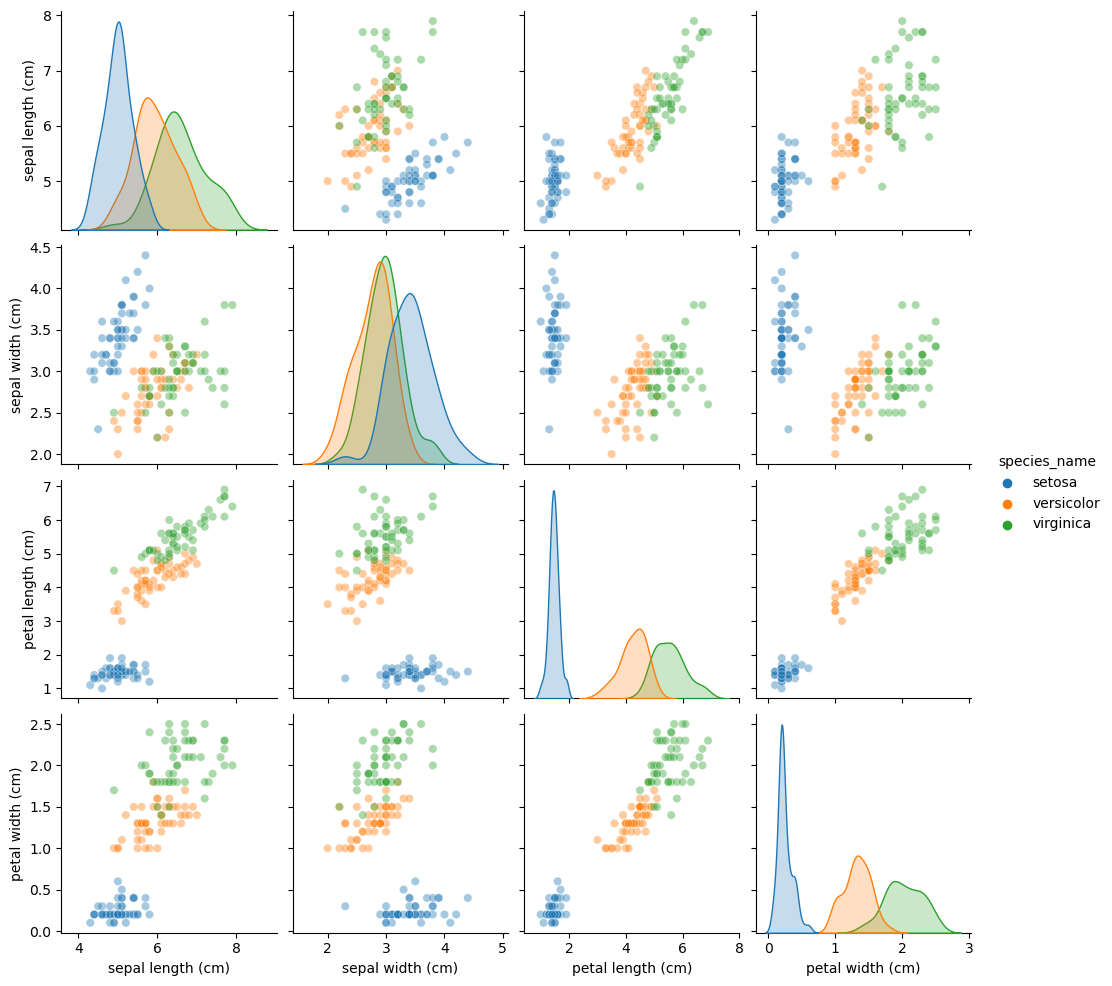

In [8]:
sns.pairplot(df.drop(columns = 'species'),
             vars= df1.columns, 
             hue='species_name', 
             # markers=['o', 'D', '+'],
             plot_kws={'alpha': .4});

## [ 5 คะแนน]
จากกราฟข้างต้น ให้เลือกตัวแปรคุณลัษณะ(Feature Variables)ที่ดีที่สุด 2 ตัว
 พร้อมให้เหตุผลว่าทำไมถึงเลือกตัวแปรดังกล่าวโดยละเอียด




ผมเลือก petal length และ petal width เพราะจากกราฟข้างต้น ดูแบ่งประเภทกล้วยไม้ได้ดีที่สุด สีส้มกับสีเขียวดูทับกันน้อยที่สุด

In [11]:
X_data = df.iloc[:,0:4]       # สร้าง X_data จาก DataFrame ที่ได้ก่อนหน้านี้
x_selected = ['petal length (cm)','petal width (cm)'] 
# ผมเลือก petal length และ petal width เพราะจากกราฟข้างต้น ดูแบ่งประเภทกล้วยไม้ได้ดีที่สุด สีส้มกับสีเขียวดูทับกันน้อยที่สุด
X = X_data[x_selected]  

## [ 3 คะแนน]
เติม Codes ให้สมบูรณ์เพื่อแบ่งชุดข้อมูล

In [13]:
test_size_i = .2
random_state_i = 247 #ใส่เลขทะเบียน 4 ตัวท้าย ของผมคือ 0247
y = df.iloc[:,-2]

(X_train, X_test, y_train, y_test) = train_test_split(X, y,
                                                    test_size = test_size_i,
                                                    random_state = random_state_i)

## [ 10 คะแนน]
กำหนดให้ตัวกำหนดแบบจำลองเบื้องต้นเป็นตัวนี้
1. criterion_i = 'entropy'
2. random_state_i = # ให้ใช้เลขทะเบียน 
3. n_estimators_i = # ให้ใข้วันที่ที่นักศึกษาทำข้อสอบนี้ เช่น 20 มกราคม ให้ใช้ 20

จงสร้างแบบจำลอง Random Forest
1. เติม Codes ให้ครบถ้วนเพื่อสร้างแบบจำลอง Ramdom Forest พร้อมการประมาณค่า
2. เติม Codes ให้ครบถ้วนเพื่อแสดง Informatin Matrix
3. จากตารางที่สร้างได้ ให้อธิบาย ค่าของ precision  และ recall ด้วยการใช้ตัวเลขประกอบการอธิบาย

In [15]:
## Declare algorithm
#กำหนดให้ตัวกำหนดแบบจำลองเบื้องต้นเป็นตัวนี้
criterion_i = 'entropy'
random_state_i = 247 #ให้ใช้เลขทะเบียน 4 ตัวท่้าย
n_estimators_i = 14 #ให้ใข้วันที่ที่นักศึกษาทำข้อสอบนี้ เช่น 20 มกราคม ให้ใช้ 20

In [16]:
# เติม Codes ให้ครบถ้วนเพื่อแสดง Informatin Matrix
# จากตารางที่สร้างได้ ให้อธิบาย ค่าของ precision  และ recall ด้วยการใช้ตัวเลขประกอบการอธิบาย

RForest= RandomForestClassifier(
            criterion= criterion_i,
            n_estimators= n_estimators_i, #default = 100 #จำนวนต้นไม้
            random_state= random_state_i, #default = None
            bootstrap = False #default = True
            )
models = RForest
model = models
model.fit(X_train,y_train)

RandomForestClassifier(bootstrap=False, criterion='entropy', n_estimators=14,
                       random_state=247)

In [17]:
## Model selection metric 
cnf_metric = confusion_matrix(y_test, model.predict(X_test))
cf_report = classification_report(y_test, model.predict(X_test),digits= 4)
###  These two are equivalent.
score = metrics.accuracy_score(y_test,model.predict(X_test))
score = model.score(X_test,y_test)

print(f'Confusion Metric \n{cnf_metric}', end='\n'*2)
print(f'Classification Report = \n{cf_report}', end='\n'*2)
print(f"train's accuracy score = {model.score(X_train,y_train):0.4f}")
print(f"test's accuracy score = {score:0.4f}")

Confusion Metric 
[[ 9  0  0]
 [ 0  9  1]
 [ 0  0 11]]

Classification Report = 
              precision    recall  f1-score   support

           0     1.0000    1.0000    1.0000         9
           1     1.0000    0.9000    0.9474        10
           2     0.9167    1.0000    0.9565        11

    accuracy                         0.9667        30
   macro avg     0.9722    0.9667    0.9680        30
weighted avg     0.9694    0.9667    0.9665        30


train's accuracy score = 0.9917
test's accuracy score = 0.9667


จากตาราง

ที่ index = 0 precision = 1 (คิดจาก Confusion Metric คือ 9/(9+0+0)) ตีความว่า ทำนายว่าเป็น species = 0 ได้ถูกต้อง 100% ของที่ทำนายว่าเป็น species = 0 ทั้งหมด

ที่ index = 1 precision = 1 (คิดจาก Confusion Metric คือ 9/(0+9+0)) ตีความว่า ทำนายว่าเป็น species = 1 ได้ถูกต้อง 100% ของที่ทำนายว่าเป็น species = 1 ทั้งหมด

ที่ index = 2 precision = 0.9167 (คิดจาก Confusion Metric คือ 11/(0+1+11)) ตีความว่า ทำนายว่าเป็น species = 2 ได้ถูกต้อง 91.67% ของที่ทำนายว่าเป็น species = 2 ทั้งหมด

ที่ index = 0 recall = 1 (คิดจาก Confusion Metric คือ 9/(9+0+0)) ตีความว่า ทำนายว่าเป็น species = 0 ได้ถูกต้อง 100% ของที่เป็น species = 0 จริง ๆ ทั้งหมด

ที่ index = 1 recall = 0.9 (คิดจาก Confusion Metric คือ 9/(0+9+1)) ตีความว่า ทำนายว่าเป็น species = 1 ได้ถูกต้อง 90% ของที่เป็น species = 1 จริง ๆ ทั้งหมด

ที่ index = 2 recall = 1 (คิดจาก Confusion Metric คือ 11/(0+0+11)) ตีความว่า ทำนายว่าเป็น species = 2 ได้ถูกต้อง 100% ของที่เป็น species = 2 จริง ๆ ทั้งหมด

## [ 7 คะแนน]
Codes ต่อไปนี้มี error อย่างน้อย 7 ที่ ให้แก้ Codes ต่อไปนี้ให้แสดงกราฟได้สำเร็จ

C:\Users\Tanyathep\anaconda3\Lib\site-packages\sklearn\base.py:464: UserWarning: X does not have valid feature names, but RandomForestClassifier was fitted with feature names
  warnings.warn(


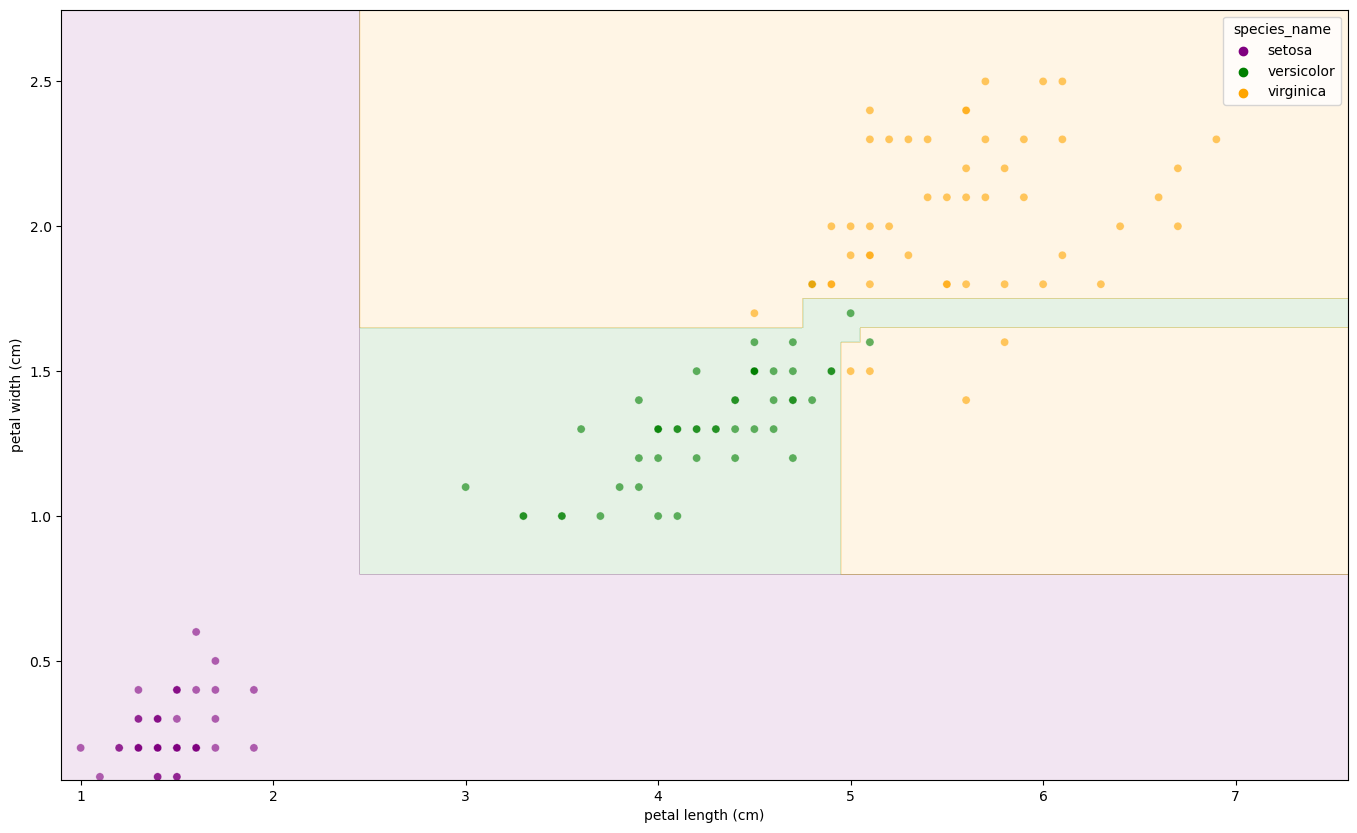

In [20]:
from matplotlib.colors import ListedColormap 

def make_area_plot(X,model): 
    
    x_min,  y_min = list(X.min()*0.9)     # Find min and push backward by 10%
    x_max, y_max = list(X.max()*1.1)     # Find max and push forward  by 10%

    x_steps = (x_max - x_min)/1000
    y_steps = (y_max - y_min)/1000
    xx, yy = np.meshgrid(np.arange(x_min, x_max, x_steps ), np.arange(y_min, y_max, y_steps))

    ### Predict target over grid lines.

    Z = models.predict(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)
    
    plt.figure(figsize = (16.6,10))

    plt.contourf(xx, yy, Z,
                 alpha = 0.1,
                 cmap = ListedColormap(['purple','green','orange']))


    sns.scatterplot(x = X.iloc[:,0], y = X.iloc[:,1],
                    hue= df.iloc[:,-1],
                    alpha= 0.6,
                    palette= ['purple','green','orange'])

    plt.show() 

make_area_plot(X,model)

## [15 คะแนน]
Searching for a "good" model

กำหนดให้ ทางเลือกของการกำหนด model เป็นดังนี้
1.  ให้ใช้ตัวแปรคุณลักษะทุกตัวในการสร้างแบบจำลอง
2. เกณฑ์การคัดกรองเป็นไปได้ระหว่าง Entropy หรือ Gini
3. จำนวนต้นไม้สามารถเป็นได้ตังแต่  5 ต้น,6 ต้น, 7 ต้น ไปจนถึง 11 ต้น
4. ใช้เกณฑ์ recall สำหรับข้อมูลทดสอบ (Test Sample) ของตัวแปรเป้าหมาย(Target Variable) ที่มีค่าเป็น versicolor

จากการกำหนดข้างต้นให้แสดงการค้นหาและระบุว่าแบบจำลองใดเป็นแบบจำลองที่ดีที่สุด
1. ให้คัดเลือกแบบตัวกำหนดแบบจำลองที่ดีที่สุด  โดย แสดงข้อมูลประกอบว่าคะแนน recall ของแต่ละทางเลือกเป็นอย่างไร
2. จากแบบจำลองที่ดีที่สุดที่ได้ระบุแล้ว ให้แสดงตาราง Classification Report ของแบบจำลองที่ดีที่สุดโดยใช้ข้อมูลทั้ง train sample และ test sample
3. จากแบบจำลองที่ดีที่สุดที่ได้ระบุแล้ว จงหาและระบุตัวแปรคุณลักษณะ (Feature Variable) ที่ดีที่สุด 3 ตัวแปรแรก 

In [23]:
X = X_data 
y = df.iloc[:,-2]

X_train, X_test, y_train, y_test = train_test_split(X, y,
                                                    test_size = test_size_i,
                                                    random_state = random_state_i)

In [24]:
n_estimators = list(range(5,12))
models= []
i = 0
for criterion_i in ['entropy','gini']:
    for n_estimators_i in n_estimators:
        i = i+1 
        model = RandomForestClassifier(
                    criterion= criterion_i,
                    n_estimators= n_estimators_i, 
                    random_state= random_state_i,
                    bootstrap = True # random choose data to make a tree
                    )
        models.append(['RF_'+str(i), model])
models

[['RF_1',
  RandomForestClassifier(criterion='entropy', n_estimators=5, random_state=247)],
 ['RF_2',
  RandomForestClassifier(criterion='entropy', n_estimators=6, random_state=247)],
 ['RF_3',
  RandomForestClassifier(criterion='entropy', n_estimators=7, random_state=247)],
 ['RF_4',
  RandomForestClassifier(criterion='entropy', n_estimators=8, random_state=247)],
 ['RF_5',
  RandomForestClassifier(criterion='entropy', n_estimators=9, random_state=247)],
 ['RF_6',
  RandomForestClassifier(criterion='entropy', n_estimators=10, random_state=247)],
 ['RF_7',
  RandomForestClassifier(criterion='entropy', n_estimators=11, random_state=247)],
 ['RF_8', RandomForestClassifier(n_estimators=5, random_state=247)],
 ['RF_9', RandomForestClassifier(n_estimators=6, random_state=247)],
 ['RF_10', RandomForestClassifier(n_estimators=7, random_state=247)],
 ['RF_11', RandomForestClassifier(n_estimators=8, random_state=247)],
 ['RF_12', RandomForestClassifier(n_estimators=9, random_state=247)],
 ['RF_

In [25]:
score_all = []

for model_name, model in models:

    model.fit(X_train, y_train) 
    fi  = model.feature_importances_
    
    for sample  in ['train','test']:
        X_ = eval('X_'+sample)
        y_ = eval('y_'+sample)
        
        accu_score = model.score(X_,y_)

        prec_score  = metrics.precision_score(y_,model.predict(X_),average= None)

        recall_score  = metrics.recall_score(y_,model.predict(X_),average= None)
        
        score_all.append([model_name,sample,accu_score,prec_score,recall_score,fi])

df_report =pd.DataFrame(score_all,columns=['model','data','accuracy','precision','recall','importantF'])
df_report

,model,data,accuracy,precision,recall,importantF
0,RF_1,train,1.000000,"[1.0, 1.0, 1.0]","[1.0, 1.0, 1.0]","[0.09309981255410517, 0.018427286664123108, 0...."
1,RF_1,test,0.933333,"[1.0, 0.9, 0.9090909090909091]","[1.0, 0.9, 0.9090909090909091]","[0.09309981255410517, 0.018427286664123108, 0...."
2,RF_2,train,0.991667,"[1.0, 0.975609756097561, 1.0]","[1.0, 1.0, 0.9743589743589743]","[0.08316769666566398, 0.015356072220102589, 0...."
3,RF_2,test,0.933333,"[1.0, 0.9, 0.9090909090909091]","[1.0, 0.9, 0.9090909090909091]","[0.08316769666566398, 0.015356072220102589, 0...."
4,RF_3,train,0.991667,"[1.0, 0.975609756097561, 1.0]","[1.0, 1.0, 0.9743589743589743]","[0.08306996756396161, 0.014248441936160098, 0...."
5,RF_3,test,0.933333,"[1.0, 0.9, 0.9090909090909091]","[1.0, 0.9, 0.9090909090909091]","[0.08306996756396161, 0.014248441936160098, 0...."
6,RF_4,train,0.991667,"[1.0, 0.975609756097561, 1.0]","[1.0, 1.0, 0.9743589743589743]","[0.07381837934104758, 0.013478434925049904, 0...."
7,RF_4,test,0.933333,"[1.0, 0.9, 0.9090909090909091]","[1.0, 0.9, 0.9090909090909091]","[0.07381837934104758, 0.013478434925049904, 0...."
8,RF_5,train,0.983333,"[1.0, 0.975, 0.9743589743589743]","[1.0, 0.975, 0.9743589743589743]","[0.06726120638491295, 0.011980831044488804, 0...."
9,RF_5,test,0.933333,"[1.0, 0.9, 0.9090909090909091]","[1.0, 0.9, 0.9090909090909091]","[0.06726120638491295, 0.011980831044488804, 0...."


In [26]:
df_report.pivot( index = 'model', columns = 'data', values= 'recall')

data,test,train
model,,
RF_1,"[1.0, 0.9, 0.9090909090909091]","[1.0, 1.0, 1.0]"
RF_10,"[1.0, 0.9, 0.9090909090909091]","[1.0, 1.0, 0.9743589743589743]"
RF_11,"[1.0, 0.9, 0.9090909090909091]","[1.0, 1.0, 0.9743589743589743]"
RF_12,"[1.0, 0.9, 0.9090909090909091]","[1.0, 0.975, 0.9743589743589743]"
RF_13,"[1.0, 0.9, 0.9090909090909091]","[1.0, 0.975, 0.9743589743589743]"
RF_14,"[1.0, 0.9, 0.9090909090909091]","[1.0, 0.975, 1.0]"
RF_2,"[1.0, 0.9, 0.9090909090909091]","[1.0, 1.0, 0.9743589743589743]"
RF_3,"[1.0, 0.9, 0.9090909090909091]","[1.0, 1.0, 0.9743589743589743]"
RF_4,"[1.0, 0.9, 0.9090909090909091]","[1.0, 1.0, 0.9743589743589743]"


In [27]:
data_i = 'test'
score_i = 'recall'

a = df_report.pivot(index = "model",  columns= 'data', values= score_i)[data_i]
n_ = a.iloc[0].shape[0]
col_names = [ score_i + '_' + str(i)+'_'+data_i for i in range(n_)]
a = pd.DataFrame( a.tolist(),columns= col_names)
a

,recall_0_test,recall_1_test,recall_2_test
0,1.0,0.9,0.909091
1,1.0,0.9,0.909091
2,1.0,0.9,0.909091
3,1.0,0.9,0.909091
4,1.0,0.9,0.909091
5,1.0,0.9,0.909091
6,1.0,0.9,0.909091
7,1.0,0.9,0.909091
8,1.0,0.9,0.909091
9,1.0,0.9,0.909091


เมื่อใช้เกณฑ์ recall สำหรับข้อมูลทดสอบ (Test Sample) ของตัวแปรเป้าหมาย(Target Variable) ที่มีค่าเป็น versicolor (species = 1) พบว่าได้คะแนน recall เท่ากันหมดจึงตัดสินไม่ได้ว่า model ที่ดีที่สุด ดังนั้นจึงขอเลือก model ที่มีต้นไม้น้อยที่สุดโดยใช้ criterion='entropy' เป็นตัวแทนของ model ที่ดีที่สุด

In [29]:
model = RandomForestClassifier(criterion= 'entropy',
                                n_estimators= 5, 
                                random_state= random_state_i,
                                bootstrap = True # random choose data to make a tree
                                )
model.fit(X_train,y_train)

RandomForestClassifier(criterion='entropy', n_estimators=5, random_state=247)

In [30]:
## Model selection metric 
cf_report = classification_report(y_train, model.predict(X_train),digits= 4)
###  These two are equivalent.
score = metrics.accuracy_score(y_train,model.predict(X_train))
score = model.score(X_train,y_train)

print('RF_1 train')
print(f'Classification Report = \n{cf_report}', end='\n'*2)

RF_1 train
Classification Report = 
              precision    recall  f1-score   support

           0     1.0000    1.0000    1.0000        41
           1     1.0000    1.0000    1.0000        40
           2     1.0000    1.0000    1.0000        39

    accuracy                         1.0000       120
   macro avg     1.0000    1.0000    1.0000       120
weighted avg     1.0000    1.0000    1.0000       120




In [31]:
## Model selection metric 
cf_report = classification_report(y_test, model.predict(X_test),digits= 4)
###  These two are equivalent.
score = metrics.accuracy_score(y_test,model.predict(X_test))
score = model.score(X_test,y_test)

print('RF_1 test')
print(f'Classification Report = \n{cf_report}', end='\n'*2)

RF_1 test
Classification Report = 
              precision    recall  f1-score   support

           0     1.0000    1.0000    1.0000         9
           1     0.9000    0.9000    0.9000        10
           2     0.9091    0.9091    0.9091        11

    accuracy                         0.9333        30
   macro avg     0.9364    0.9364    0.9364        30
weighted avg     0.9333    0.9333    0.9333        30




In [32]:
e = pd.DataFrame(df_report.importantF.tolist(),columns= list(X.columns))

In [33]:
print('RF_1')
e.iloc[0:2,:]

RF_1


,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
0,0.0931,0.018427,0.576876,0.311597
1,0.0931,0.018427,0.576876,0.311597


ตัวแปรคุณลักษณะ (Feature Variable) ที่ดีที่สุด 3 ตัวแปรแรก (ได้ importantF มากที่สุด 3 ตัวแปรแรก) คือ petal length (cm), petal width (cm) และ sepal length (cm)